### Importando as bibliotecas utilizadas

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.image as mpimg
#converter as imagens para tons de cinza
#from skimage import color

## Testando Biblioteca

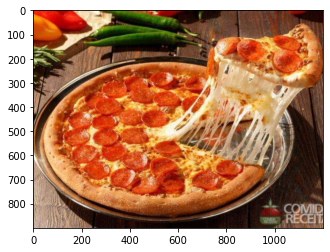

In [2]:
image = plt.imread('pizza')
plt.imshow(image)

### Tamanho da matriz

In [3]:
image.shape

(900, 1200, 3)

### Formato RGB

#### Deixando a imagem toda vermelha, zerando as camadas verde e azul

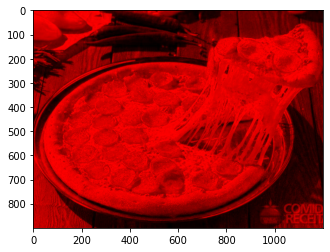

In [4]:
r = image.copy()
r[:,:,1] = 0
r[:,:,2] = 0
plt.imshow(r)

#### Deixando a imagem toda verde, zerando as camadas vermelho e azul

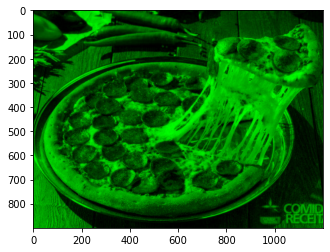

In [5]:
r = image.copy()
r[:,:,0] = 0
r[:,:,2] = 0
plt.imshow(r)

#### Deixando a imagem toda azul, zerando as camadas vermelho e verde

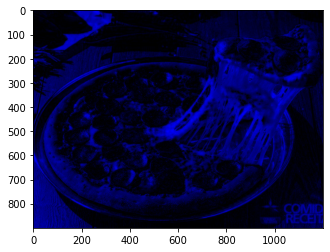

In [6]:
r = image.copy()
r[:,:,0] = 0
r[:,:,1] = 0
plt.imshow(r)

## Histograma

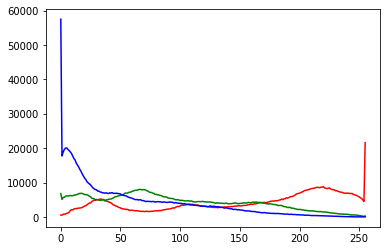

In [7]:
hr, bins = np.histogram(image[:,:,0], bins=256)
hg, bins = np.histogram(image[:,:,1], bins=256)
hb, bins = np.histogram(image[:,:,2], bins=256)

plt.plot(hr, color='r')
plt.plot(hg, color='g')
plt.plot(hb, color='b')

# Tarefa 1 - Comparação de imagens

### Código de comparação do histograma, fornecido pela Prof.Karin

In [8]:
def return_intersection(hist_1, hist_2):
    minima = np.minimum(hist_1, hist_2)
    intersection = np.true_divide(np.sum(minima), np.sum(hist_2))
    return intersection

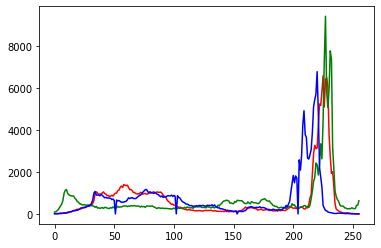

In [9]:
#Histograma do Hulk
image = plt.imread('./Base1/Hulk.png')
hr, bins = np.histogram(image[:,:,0], bins=256)
hg, bins = np.histogram(image[:,:,1], bins=256)
hb, bins = np.histogram(image[:,:,2], bins=256)

plt.plot(hr, color='r')
plt.plot(hg, color='g')
plt.plot(hb, color='b')

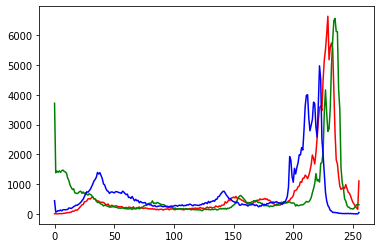

In [10]:
#Histograma da Mulher Maravilha
image = plt.imread('./Base1/Maravilha.png')
hr2, bins = np.histogram(image[:,:,0], bins=256)
hg2, bins = np.histogram(image[:,:,1], bins=256)
hb2, bins = np.histogram(image[:,:,2], bins=256)

plt.plot(hr2, color='r')
plt.plot(hg2, color='g')
plt.plot(hb2, color='b')

### Comparando - Exemplo

In [11]:
r = return_intersection(hr, hr2)
g = return_intersection(hg, hg2)
b = return_intersection(hb, hb2)

compatibilidade = r+g+b

#print(r, g, b)
#Resultado da soma dividido pelo maximo == porcentagem de acerto
print((compatibilidade / 3) * 100)

70.10873844506385


## Iniciando o treinamento do algoritmo

### Funções utilizadas para o cálculo de comparação e plotagem dos histogramas
#### Lembrando que também é utilizada a função fornecida pela Prof.Karin (declarada anteriormente).

In [12]:
def show_img(caminho_img):
    image = plt.imread(caminho_img)
    plt.imshow(image)

def show_img_gray(caminho_img):
    image = plt.imread(caminho_img)
    imgGray = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])
    print(image)
    print("-----------------KELVIN-------------")
    print(imgGray)
    plt.imshow(imgGray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
    plt.show()
    #input()
    
### TERMINAR DE IMPLEMENTAR
def convert_to_gray(image):
    #img = plt.imread(image)
    r, g, b = image[:,:,0], image[:,:,1], image[:,:,2]
    imgGray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    print(image)
    print("----------------------")
    print(imgGray)
    input()
    plt.imshow(imgGray, cmap='gray')
    plt.show()
    return imgGray
    
#Ler a imagem dado o caminho e retorn o histograma referente a cada cor
def get_histograma(caminho_imagem):
    image = plt.imread(caminho_imagem)
    hr, bins = np.histogram(image[:,:,0], bins=256)
    hg, bins = np.histogram(image[:,:,1], bins=256)
    hb, bins = np.histogram(image[:,:,2], bins=256)
    
    return hr, hg, hb

#Plota o grafico do histograma dado os valores do mesmo
def plot_histograma(hr, hg, hb):
    plt.plot(hr, color='r')
    plt.plot(hg, color='g')
    plt.plot(hb, color='b')


#Captura o histograma de cada imagem, comparar e retorna o grau de compatibilidade convertido em porcentagem
def calc_histograma(imagem1, imagem2):
    hr1, hg1, hb1 = get_histograma(imagem1)
    hr2, hg2, hb2 = get_histograma(imagem2)
    
    r = return_intersection(hr1, hr2)
    g = return_intersection(hg1, hg2)
    b = return_intersection(hb1, hb2)
    
    compatibilidade = r+g+b
    percent_compat = (compatibilidade / 3) * 100
    #print("%s\t%s:\t\t\t%.2f%%" %(imagem1, imagem2, percent_compat))
    return percent_compat


def show_grafico(dic_dados):
    eixo_x = list(dic_dados.values())
    eixo_y = list(dic_dados.keys())

    plt.barh(eixo_y, eixo_x, 0.5, color="red")
    
    #Mostrar valores ao lado das barras
    for i, v in enumerate(eixo_x):
        plt.text(v, i , str(v)+'%', color='blue')
        
    plt.show()

#Recebe uma lista de modelos e uma lista de testes
#Mostra na tela o nome da imagem a ser testada e a porcentagem de acerto referente a cada modelo
def executa_testes(list_modelos, list_testes):
    for img_teste in list_testes:
        resultado = {}
        for img_base in list_modelos:
            quem_eh = calc_histograma(img_teste, img_base)
            resultado[img_base] = round(quem_eh, 2)

        print(img_teste)
        #show_img_gray(img_teste)
        #print(resultado)
        show_grafico(resultado)
    
#Retorna uma lista concatenando o nome do diretorio + nome da imagem
def concat_dir(diretorio, lista_imgs):
    return [diretorio + image for image in lista_imgs]
    

### Diretorio e caminho das imagens

In [13]:
diretorio_base1 = './Base1/'
diretorio_base2 = './Base2/'
modelos_img = ['America.png', 'Batman.png', 'Ferro.png', 'Flash.png', 
           'Hulk.png', 'Maravilha.png', 'super.png', 'wolverine.png', 'QUEM3.png']
modelos_img = concat_dir(diretorio_base1, modelos_img)

teste1_img = ['QUEM1.png', 'QUEM2.png', 'QUEM3.png', 'QUEM4.png', 'QUEM5.png']
teste1_img = concat_dir(diretorio_base1, teste1_img)

teste2_img = ['quem6.png', 'quem7.png', 'quem8.png', 'quem9.png', 'quem10.png', 
              'quem11.png', 'quem12.png', 'quem13.png', 'quem14.png', 'quem15.png', 'quem16.png']
teste2_img = concat_dir(diretorio_base2, teste2_img)


## 1ª e 2ª parte da Tarefa
### Utilizando a 1ª base de testes

./Base1/QUEM1.png


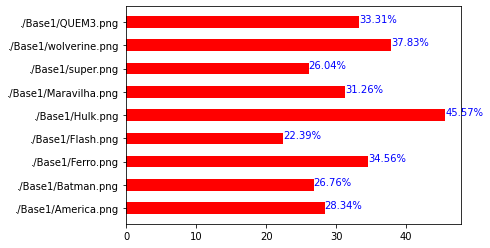

./Base1/QUEM2.png


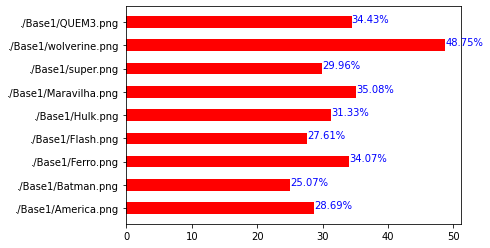

./Base1/QUEM3.png


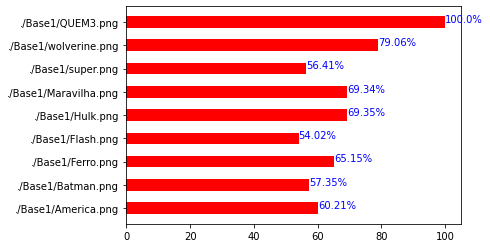

./Base1/QUEM4.png


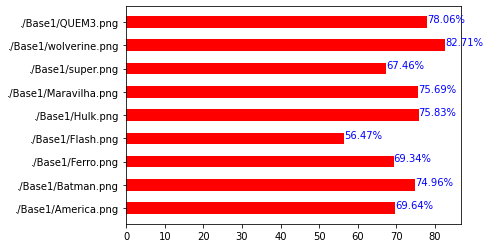

./Base1/QUEM5.png


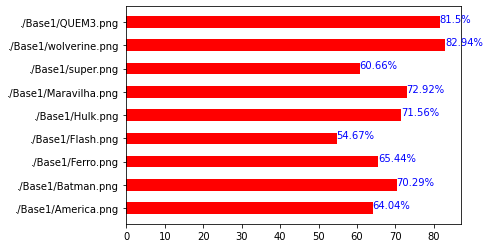

In [14]:
executa_testes(modelos_img, teste1_img)
#executa_testes(modelos_img, modelos_img)

## 3ª Parte da Tarefa
### Utilizando a 2ª base de testes

./Base2/quem6.png


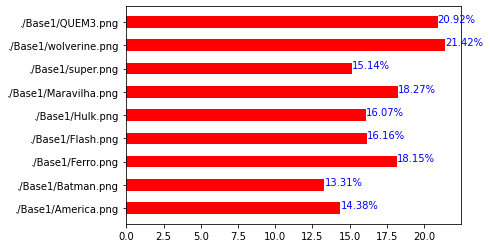

./Base2/quem7.png


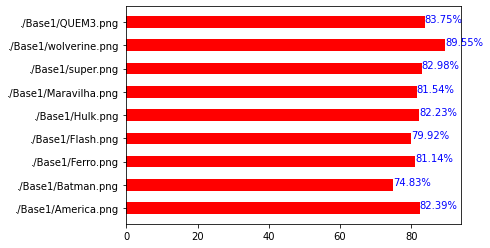

./Base2/quem8.png


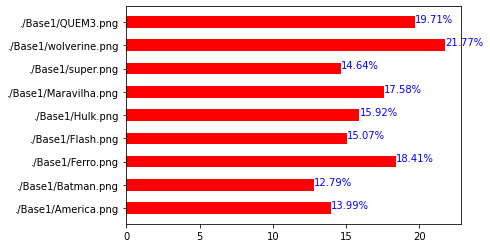

./Base2/quem9.png


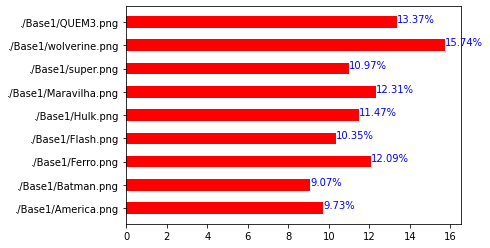

./Base2/quem10.png


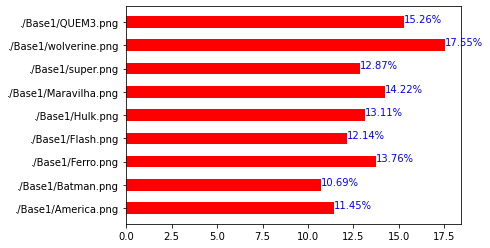

./Base2/quem11.png


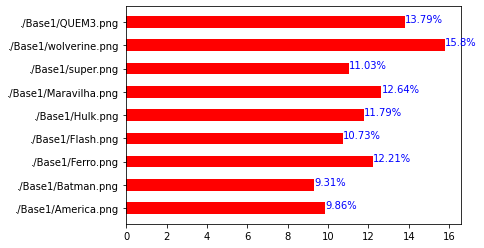

./Base2/quem12.png


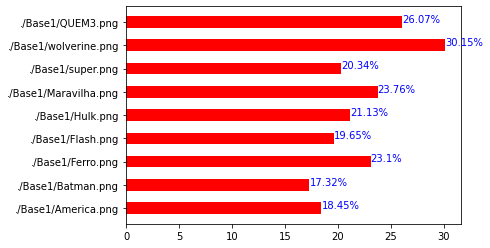

./Base2/quem13.png


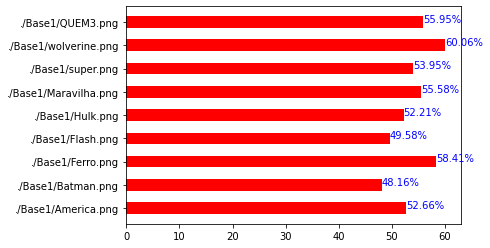

./Base2/quem14.png


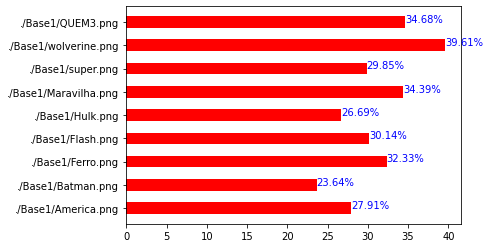

./Base2/quem15.png


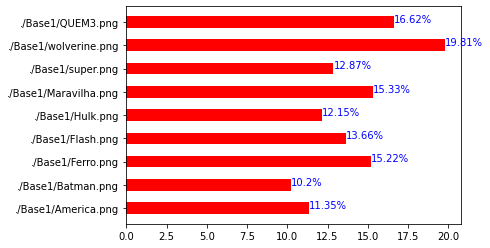

./Base2/quem16.png


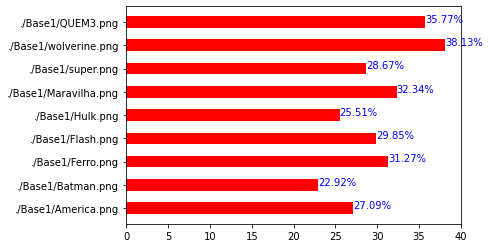

In [15]:
executa_testes(modelos_img, teste2_img)

## Utilizando outras formas de comparação

### Salvando os histogramas de cada imagem num dicionario

In [16]:
#Importando as novas bibliotecas necessarias
#Verificar quais de fato estao sendo utilizadas


from scipy.spatial import distance as dit
import argparse
#import glob
#pip3 install scikit-build (Necessario para a instalacao do opencv)
#sudo pip3 install --upgrade pip (Necessario upgrade do pip por conta do cmake)
#pip3 install opencv-python
import cv2

#Criando dois dicionarios
#index para os histogramas extraidos
#images para armazenar as imagens
dic_index = {}
#dic_images = {}

for img in modelos_img:
    #print(img)
    image = cv2.imread(img)
    #convertemos para RGB, pois o openCV armazena no formato BGR (RGB para exibir no matplot)
    #dic_images[img] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    #Calculo do histograma
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    
    #Normalizando histograma
    hist = cv2.normalize(hist, hist).flatten()
    
    #Armazenando no dicionario
    dic_index[img] = hist

#print(dic_images)

### Usando Funções do OpenCV (cv2.compareHist)

#### Funções para calculo de compatibilidade (Por cada método ter um range de resultados diferentes)

In [33]:
'''
Para algunas funcoes de similaridade, um valor GRANDE significa maior similaridade (Correlation & Intersection).
E para outros, um valor PEQUENO indica maior similaridade (Chi-Squared & Hellinger).
'''
#min...max (menor compatibilidade...maior compatibilidade)
#Intersection
#0...3
def calc_percent_intersec(valor):
    return (valor/3) * 100

#Chi-Squared
#100...0
#Normalizar
'''
def calc_percent_chisquar(valor):
    return 100-valor
'''
def calc_percent_chisquar(dic_results):
    min_value = min(dic_results.values())
    max_value = max(dic_results.values())
    new_dic = {}
    
    #Normalizando os valores
    for key in dic_results:
        new_dic[key] = (dic_results[key] - min_value) / (max_value - min_value)
    
    #Em seguida, eh aplicado o mesmo calculo da porcentagem de Hellinger
    for key in new_dic:
        #print(key)
        new_dic[key] = calc_percent_hellinger(new_dic[key])
        #print(new_dic[key])
    #print(new_dic)
    return new_dic

#Correlation
#0...1
def calc_percent_correlation(valor):
    return valor * 100

#Hellinger
#1...0
def calc_percent_hellinger(valor):
    return (1-valor) * 100

#### Execução dos métodos do OpenCV

Chi-Squared


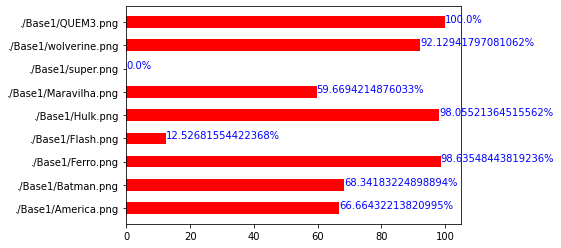

Correlation


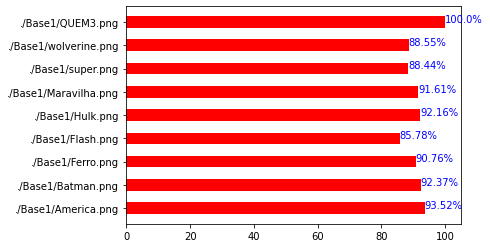

Intersection


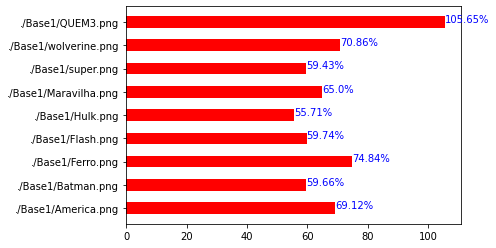

Hellinger


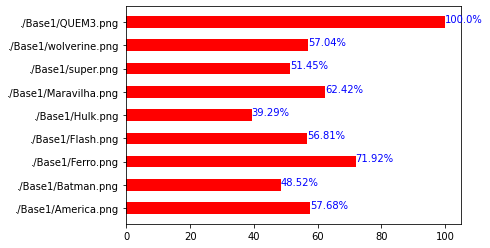

In [37]:
#Dicionario para os metodos de comparacao dos histogramas
opencv_methods = {
    ("Correlation", cv2.HISTCMP_CORREL),
    ("Chi-Squared", cv2.HISTCMP_CHISQR),
    ("Intersection", cv2.HISTCMP_INTERSECT),
    ("Hellinger", cv2.HISTCMP_BHATTACHARYYA)
}

for(nome_metodo, funcao_metodo) in opencv_methods:
    #Inicia/Reinicia o dicionario de resultados
    results = {}
    #Loop sobre o dic_index(Onde possui os resultados dos histogramas)
    for(img, hist) in dic_index.items():
        #print(k, hist)
        #input()
        #Utilizando primeira imagem como teste--TROCAR PRA TODOS
        d = cv2.compareHist(dic_index['./Base1/QUEM3.png'], hist, funcao_metodo)
            
        #Para fins de visualizacao em porcentagem, calcula com base no metodo
        percent_result = 0
        if(nome_metodo == "Correlation"): 
            percent_result = calc_percent_correlation(d)
        elif(nome_metodo == "Intersection"): 
            percent_result = calc_percent_intersec(d)
        elif(nome_metodo == "Hellinger"):
            percent_result = calc_percent_hellinger(d)
        else:
            percent_result = d
            
        #results atualizado com o valor da distancia da respectiva comparacao
        results[img] = round(percent_result, 2)
        
        #print(d)
        #results[img] = d
    
    #Necessario fazer ao fim do loop devido a normalizacao
    #O maior valor se torna 0 e o menor 100
    if(nome_metodo == 'Chi-Squared'):
        results = calc_percent_chisquar(results)
        
    #Mostrando os resultados
    print(nome_metodo)
    show_grafico(results) 